In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d puneet6060/intel-image-classification

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
 97% 335M/346M [00:03<00:00, 162MB/s]
100% 346M/346M [00:03<00:00, 115MB/s]


In [3]:
import zipfile
zip = zipfile.ZipFile('/content/intel-image-classification.zip')
zip.extractall('/content')
zip.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2

In [5]:
training_data = keras.utils.image_dataset_from_directory(
    '/content/seg_train/seg_train',
    labels="inferred",
    label_mode="int",
    batch_size=64,
    image_size=(256, 256)
)

validation_data = keras.utils.image_dataset_from_directory(
    '/content/seg_test/seg_test',
    labels="inferred",
    label_mode="int",
    batch_size=64,
    image_size=(256, 256)
)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [6]:
def normalize(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

  training_data = training_data.map(normalize)
  validation_data = validation_data.map(normalize)

In [7]:
model = Sequential()

model.add(Conv2D(256, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
memory = model.fit(training_data, epochs=10, validation_data=validation_data)

Epoch 1/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 209s 786ms/step - accuracy: 0.5727 - loss: 1.1187 - val_accuracy: 0.5513 - val_loss: 1.3153
Epoch 2/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 199s 648ms/step - accuracy: 0.7586 - loss: 0.6751 - val_accuracy: 0.7373 - val_loss: 0.8045
Epoch 3/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 198s 628ms/step - accuracy: 0.8167 - loss: 0.5021 - val_accuracy: 0.7637 - val_loss: 0.6513
Epoch 4/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 146s 647ms/step - accuracy: 0.8547 - loss: 0.4052 - val_accuracy: 0.7430 - val_loss: 0.8574
Epoch 5/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 202s 645ms/step - accuracy: 0.8815 - loss: 0.3255 - val_accuracy: 0.7920 - val_loss: 0.6851
Epoch 6/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 198s 626ms/step - accuracy: 0.9144 - loss: 0.2381 - val_accuracy: 0.8020 - val_loss: 0.6566
Epoch 7/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 142s 626ms/step - accuracy: 0.9263 - loss: 0.2002 - val_accuracy: 0.7890 - val_loss: 0.6810
Epoch 8/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 142s 626ms/step - accuracy: 0.9462 -

In [10]:
training_accuracy = memory.history['accuracy']
validation_accuracy = memory.history['val_accuracy']

final_training_accuracy = training_accuracy[-1]*100
final_validation_accuracy = validation_accuracy[-1]*100

print(f"Final training accuracy: {final_training_accuracy:.2f}%")
print(f"Final validation accuracy: {final_validation_accuracy:.2f}%")

Final training accuracy: 96.34%
Final validation accuracy: 78.53%


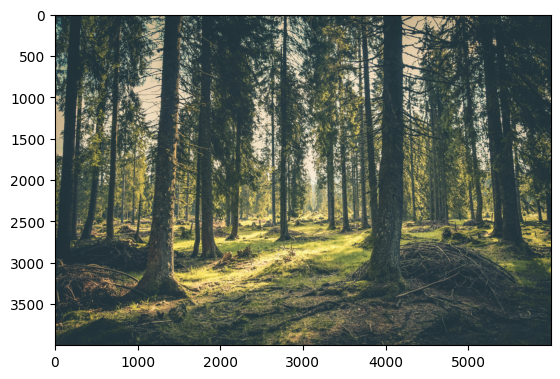

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
The image is classified as: Forest


In [20]:
import numpy as np

# Load and preprocess the test image
test_img = cv2.imread('/content/pexels-jakkel-418831.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()

# Resize the image to match the input size of the model
test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))

# Predict the class using the trained model
result = model.predict(test_inp)

# Define the class labels
class_labels = [
    'Buildings', 'Forest', 'Glacier', 'Mountain', 'Sea',
    'Street']

# Find the index of the class with the highest probability
predicted_class = np.argmax(result)

# Print the predicted class label
print(f'The image is classified as: {class_labels[predicted_class]}')

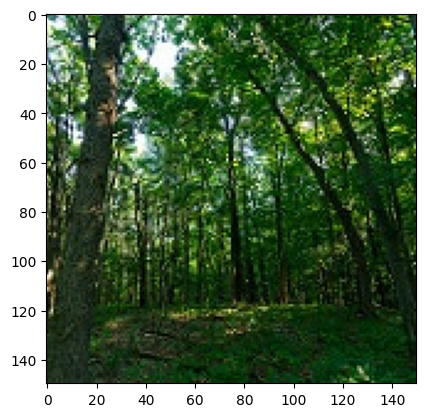

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The image is classified as: Forest


In [21]:
import numpy as np

# Load and preprocess the test image
test_img = cv2.imread('/content/seg_pred/seg_pred/1018.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()

# Resize the image to match the input size of the model
test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))

# Predict the class using the trained model
result = model.predict(test_inp)

# Define the class labels
class_labels = [
    'Buildings', 'Forest', 'Glacier', 'Mountain', 'Sea',
    'Street']

# Find the index of the class with the highest probability
predicted_class = np.argmax(result)

# Print the predicted class label
print(f'The image is classified as: {class_labels[predicted_class]}')

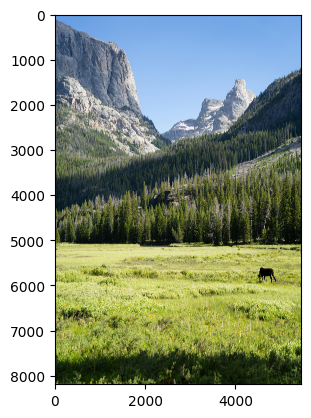

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The image is classified as: Mountain


In [22]:
import numpy as np

# Load and preprocess the test image
test_img = cv2.imread('/content/pexels-alexmoliski-27082655.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()

# Resize the image to match the input size of the model
test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))

# Predict the class using the trained model
result = model.predict(test_inp)

# Define the class labels
class_labels = [
    'Buildings', 'Forest', 'Glacier', 'Mountain', 'Sea',
    'Street']

# Find the index of the class with the highest probability
predicted_class = np.argmax(result)

# Print the predicted class label
print(f'The image is classified as: {class_labels[predicted_class]}')

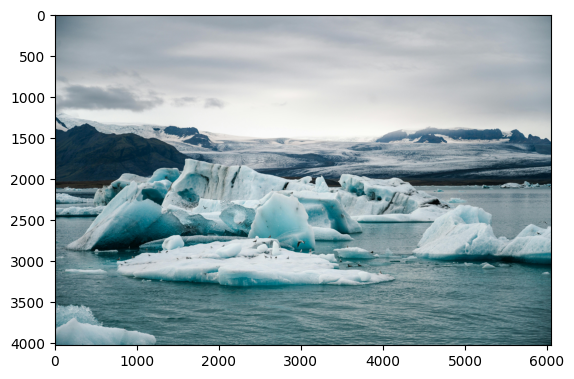

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The image is classified as: Sea


In [23]:
import numpy as np

# Load and preprocess the test image
test_img = cv2.imread('/content/pexels-aliona-pasha-1687920-3219773.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()

# Resize the image to match the input size of the model
test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))

# Predict the class using the trained model
result = model.predict(test_inp)

# Define the class labels
class_labels = [
    'Buildings', 'Forest', 'Glacier', 'Mountain', 'Sea',
    'Street']

# Find the index of the class with the highest probability
predicted_class = np.argmax(result)

# Print the predicted class label
print(f'The image is classified as: {class_labels[predicted_class]}')

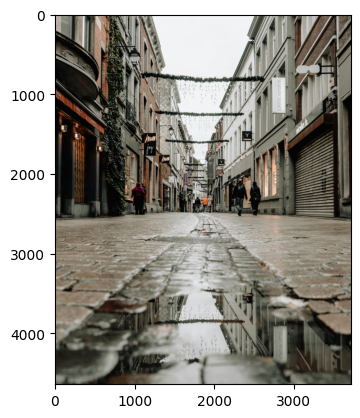

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The image is classified as: Street


In [24]:
import numpy as np

# Load and preprocess the test image
test_img = cv2.imread('/content/pexels-guihankenne-1655304.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()

# Resize the image to match the input size of the model
test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))

# Predict the class using the trained model
result = model.predict(test_inp)

# Define the class labels
class_labels = [
    'Buildings', 'Forest', 'Glacier', 'Mountain', 'Sea',
    'Street']

# Find the index of the class with the highest probability
predicted_class = np.argmax(result)

# Print the predicted class label
print(f'The image is classified as: {class_labels[predicted_class]}')

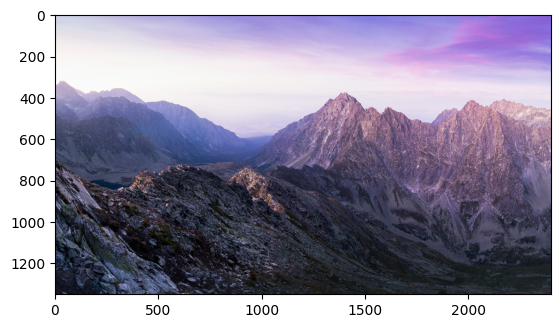

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The image is classified as: Mountain


In [41]:
import numpy as np

# Load and preprocess the test image
test_img = cv2.imread('/content/stefan-stefancik--g7axSVst6Y-unsplash.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()

# Resize the image to match the input size of the model
test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))

# Predict the class using the trained model
result = model.predict(test_inp)

# Define the class labels
class_labels = [
    'Buildings', 'Forest', 'Glacier', 'Mountain', 'Sea',
    'Street']

# Find the index of the class with the highest probability
predicted_class = np.argmax(result)

# Print the predicted class label
print(f'The image is classified as: {class_labels[predicted_class]}')

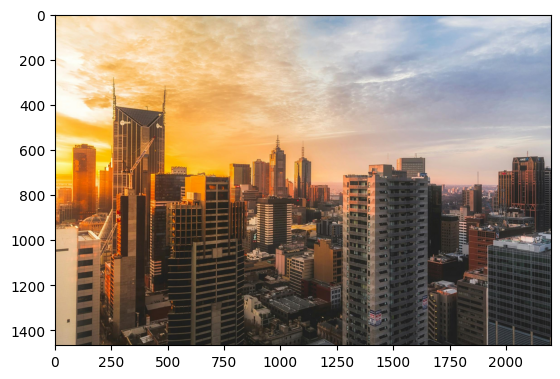

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The image is classified as: Buildings


In [26]:
import numpy as np

# Load and preprocess the test image
test_img = cv2.imread('/content/pexels-pixabay-302769.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()

# Resize the image to match the input size of the model
test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))

# Predict the class using the trained model
result = model.predict(test_inp)

# Define the class labels
class_labels = [
    'Buildings', 'Forest', 'Glacier', 'Mountain', 'Sea',
    'Street']

# Find the index of the class with the highest probability
predicted_class = np.argmax(result)

# Print the predicted class label
print(f'The image is classified as: {class_labels[predicted_class]}')

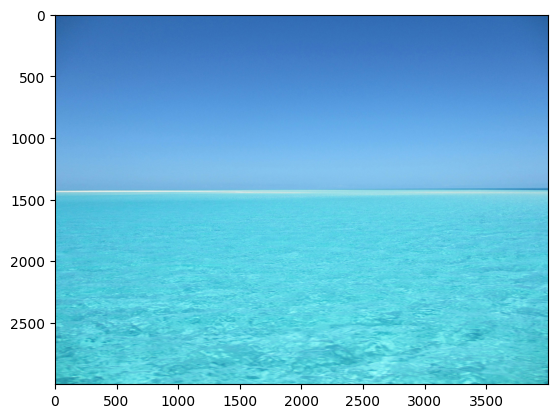

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The image is classified as: Sea


In [19]:
import numpy as np

# Load and preprocess the test image
test_img = cv2.imread('/content/pexels-sara-8693-63340.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()

# Resize the image to match the input size of the model
test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))

# Predict the class using the trained model
result = model.predict(test_inp)

# Define the class labels
class_labels = [
    'Buildings', 'Forest', 'Glacier', 'Mountain', 'Sea',
    'Street']

# Find the index of the class with the highest probability
predicted_class = np.argmax(result)

# Print the predicted class label
print(f'The image is classified as: {class_labels[predicted_class]}')

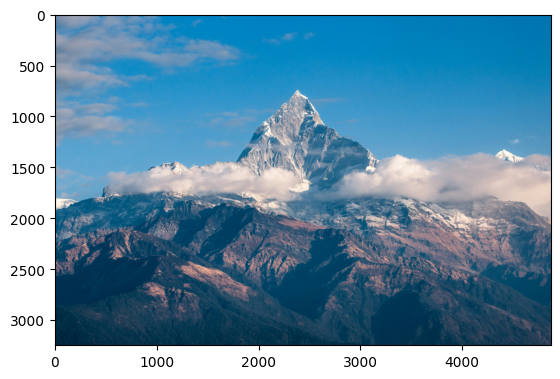

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The image is classified as: Glacier


In [27]:
import numpy as np

# Load and preprocess the test image
test_img = cv2.imread('/content/pexels-pixabay-417173.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()

# Resize the image to match the input size of the model
test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))

# Predict the class using the trained model
result = model.predict(test_inp)

# Define the class labels
class_labels = [
    'Buildings', 'Forest', 'Glacier', 'Mountain', 'Sea',
    'Street']

# Find the index of the class with the highest probability
predicted_class = np.argmax(result)

# Print the predicted class label
print(f'The image is classified as: {class_labels[predicted_class]}')

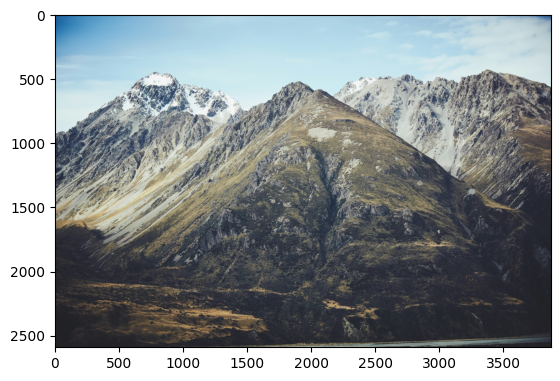

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The image is classified as: Mountain


In [33]:
import numpy as np

# Load and preprocess the test image
test_img = cv2.imread('/content/aleks-dahlberg-pVATCBKLH8w-unsplash.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()

# Resize the image to match the input size of the model
test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))

# Predict the class using the trained model
result = model.predict(test_inp)

# Define the class labels
class_labels = [
    'Buildings', 'Forest', 'Glacier', 'Mountain', 'Sea',
    'Street']

# Find the index of the class with the highest probability
predicted_class = np.argmax(result)

# Print the predicted class label
print(f'The image is classified as: {class_labels[predicted_class]}')

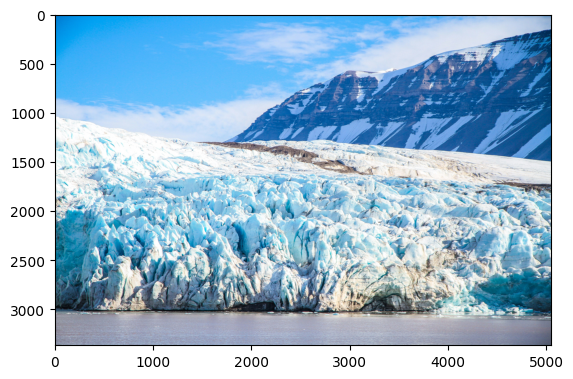

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The image is classified as: Glacier


In [34]:
# Load and preprocess the test image
test_img = cv2.imread('/content/vince-gx-tGtwSGyY8Lk-unsplash.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()

# Resize the image to match the input size of the model
test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))

# Predict the class using the trained model
result = model.predict(test_inp)

# Define the class labels
class_labels = [
    'Buildings', 'Forest', 'Glacier', 'Mountain', 'Sea',
    'Street']

# Find the index of the class with the highest probability
predicted_class = np.argmax(result)

# Print the predicted class label
print(f'The image is classified as: {class_labels[predicted_class]}')

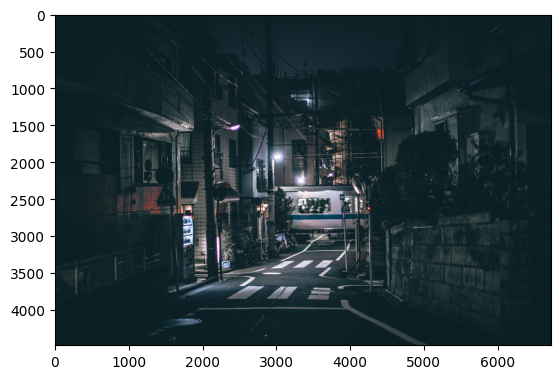

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The image is classified as: Street


In [35]:
# Load and preprocess the test image
test_img = cv2.imread('/content/andre-benz-qi2hmCwlhcE-unsplash.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()

# Resize the image to match the input size of the model
test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))

# Predict the class using the trained model
result = model.predict(test_inp)

# Define the class labels
class_labels = [
    'Buildings', 'Forest', 'Glacier', 'Mountain', 'Sea',
    'Street']

# Find the index of the class with the highest probability
predicted_class = np.argmax(result)

# Print the predicted class label
print(f'The image is classified as: {class_labels[predicted_class]}')

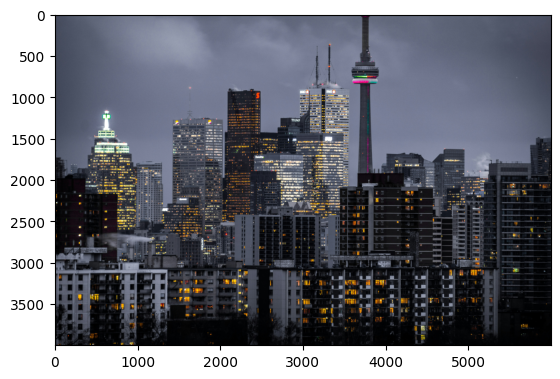

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The image is classified as: Buildings


In [38]:
# Load and preprocess the test image
test_img = cv2.imread('/content/zia-syed-gOq27RHoL3s-unsplash.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()

# Resize the image to match the input size of the model
test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))

# Predict the class using the trained model
result = model.predict(test_inp)

# Define the class labels
class_labels = [
    'Buildings', 'Forest', 'Glacier', 'Mountain', 'Sea',
    'Street']

# Find the index of the class with the highest probability
predicted_class = np.argmax(result)

# Print the predicted class label
print(f'The image is classified as: {class_labels[predicted_class]}')

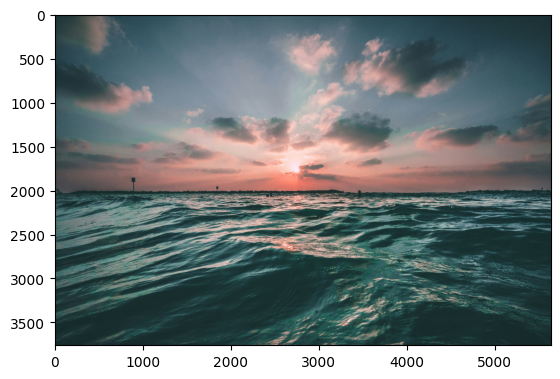

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The image is classified as: Sea


In [39]:
# Load and preprocess the test image
test_img = cv2.imread('/content/joseph-barrientos-oQl0eVYd_n8-unsplash.jpg')
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_rgb)
plt.show()

# Resize the image to match the input size of the model
test_img = cv2.resize(test_img, (256, 256))
test_inp = test_img.reshape((1, 256, 256, 3))

# Predict the class using the trained model
result = model.predict(test_inp)

# Define the class labels
class_labels = [
    'Buildings', 'Forest', 'Glacier', 'Mountain', 'Sea',
    'Street']

# Find the index of the class with the highest probability
predicted_class = np.argmax(result)

# Print the predicted class label
print(f'The image is classified as: {class_labels[predicted_class]}')